<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas

from unidecode import unidecode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sNut = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print(f"Disponibilité alimentaire : {dispo.shape[0]} lignes, {dispo.shape[1]} colonnes")

Disponibilité alimentaire : 15605 lignes, 18 colonnes


In [10]:
#Consulter le nombre de colonnes
dispo.shape[1]

18

In [11]:
#Affichage les 5 premières lignes de la table
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo = dispo.fillna(0)

In [13]:
#Formatage des colonnes et données
#Pour population
# Nettoyage noms de colonnes
population.columns = population.columns.str.lower().str.replace('[éè]', 'e', regex=True)

# Nettoyage texte
text_cols = population.select_dtypes(include='object').columns
for col in text_cols:
    population[col] = population[col].astype(str).str.lower().str.strip().apply(unidecode)

# Conversion colonnes numériques et remplissage NaN

population['valeur'] = pd.to_numeric(population['population'], errors='coerce').fillna(0)
#Pour Dispo
# Nettoyage noms de colonnes
# Renommage des colonnes
dispo = dispo.rename(columns = {
    'Aliments pour animaux':'aliments_animaux', 'Autres Utilisations':'autres_utilisations',
    'Disponibilité alimentaire (Kcal/personne/jour)':'disponibilite_kcal_p_j',
    'Disponibilité alimentaire en quantité (kg/personne/an)':'disponibilite_kg_p_an',
    'Disponibilité de matière grasse en quantité (g/personne/jour)':'disponibilite_MG_g_p_j',
    'Disponibilité de protéines en quantité (g/personne/jour)':'disponibilite_proteines_g_p_j',
    'Disponibilité intérieure':'disponibilite_interieure', 'Exportations - Quantité':'exportations',
    'Importations - Quantité':'importations', 'Variation de stock':'variation_stock'
})
dispo.columns = dispo.columns.str.lower().str.replace('[éè]', 'e', regex=True)

# Nettoyage texte
text_cols = dispo.select_dtypes(include='object').columns
for col in text_cols:
    dispo[col] = dispo[col].astype(str).str.lower().str.strip().apply(unidecode)

# Conversion colonnes numériques et remplissage NaN
numeric_cols_text = ['aliments_animaux','autres_utilisations','disponibilite_kcal_p_j','disponibilite_kg_p_an',
                     'disponibilite_mg_g_p_j','disponibilite_proteines_g_p_j',
                     'disponibilite_interieure','exportations','importations','pertes','production','semences','traitement','variation_stock']

for col in numeric_cols_text:
    dispo[col] = pd.to_numeric(dispo[col], errors='coerce').fillna(0)
#pour aide_alim
# Nettoyage noms de colonnes
aide.columns = aide.columns.str.lower().str.replace('[éè]', 'e', regex=True)

# Nettoyage texte
text_cols = aide.select_dtypes(include='object').columns
for col in text_cols:
    aide[col] = aide[col].astype(str).str.lower().str.strip().apply(unidecode)

# Conversion colonnes numériques et remplissage NaN
aide[col] = pd.to_numeric(aide[col], errors='coerce').fillna(0)

#pour Sous nutrition( sNut)
# Nettoyage noms de colonnes
sNut.columns = sNut.columns.str.lower().str.replace('[éè]', 'e', regex=True)

# Nettoyage texte
text_cols = sNut.select_dtypes(include='object').columns
for col in text_cols:
    sNut[col] = sNut[col].astype(str).str.lower().str.strip().apply(unidecode)

# Conversion colonnes numériques et remplissage NaN
sNut[col] = pd.to_numeric(sNut[col], errors='coerce')

In [14]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
if dispo['production'].max() < 10_000_000:
    col_millier_tonnes = ['aliments_animaux', 'autres_utilisations', 'disponibilite_interieure',
                          'exportations', 'importations', 'nourriture',
                          'pertes', 'production', 'semences', 'traitement', 'variation_stock']
    
    # On ne multiplie que les colonnes qui existent réellement dans le dataframe
    col_presentes = [c for c in col_millier_tonnes if c in dispo.columns]
    dispo[col_presentes] = dispo[col_presentes] * 1_000_000

In [15]:
#Affichage les 5 premières lignes de la table
dispo.head()

,zone,produit,origine,aliments_animaux,autres_utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,afghanistan,abats comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,afghanistan,"agrumes, autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,afghanistan,aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,afghanistan,ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,afghanistan,bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
print(aide.shape)

(1475, 4)


In [17]:
#Consulter le nombre de colonnes
aide.shape[1]

4

In [18]:
#Affichage les 5 premières lignes de la table
aide.head()

,pays beneficiaire,annee,produit,valeur
0,afghanistan,2013,0.0,682
1,afghanistan,2014,0.0,335
2,afghanistan,2013,0.0,39224
3,afghanistan,2014,0.0,15160
4,afghanistan,2013,0.0,40504


In [19]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide = aide.rename(columns={"pays beneficiaire": "zone"})

In [20]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide = aide.rename(columns={"valeur" : "aide_alimentaire"})
aide["aide_alimentaire"] = aide["aide_alimentaire"]*1000

In [21]:
#Affichage les 5 premières lignes de la table
aide.head()

,zone,annee,produit,aide_alimentaire
0,afghanistan,2013,0.0,682000
1,afghanistan,2014,0.0,335000
2,afghanistan,2013,0.0,39224000
3,afghanistan,2014,0.0,15160000
4,afghanistan,2013,0.0,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [22]:
#Afficher les dimensions du dataset
print(sNut.shape)

(1218, 3)


In [23]:
#Consulter le nombre de colonnes
sNut.shape[1]

3

In [24]:
#Afficher les 5 premières lignes de la table
sNut.head()

,zone,annee,valeur
0,afghanistan,2012-2014,8.6
1,afghanistan,2013-2015,8.8
2,afghanistan,2014-2016,8.9
3,afghanistan,2015-2017,9.7
4,afghanistan,2016-2018,10.5


In [25]:
#Conversion de la colonne sous nutrition en numérique
sNut['valeur'] = pd.to_numeric(sNut['valeur'])

In [26]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sNut['valeur'] = pd.to_numeric(sNut['valeur'], errors='coerce').fillna(0)

In [27]:
#changement du nom de la colonne Valeur par sous_nutrition
sNut = sNut.rename(columns={"valeur" : "sous_nutrition"})

In [28]:
#Multiplication de la colonne sous_nutrition par 1000000
sNut["sous_nutrition"] = sNut["sous_nutrition"] * 1000000

In [29]:
#Afficher les 5 premières lignes de la table
sNut.head()

,zone,annee,sous_nutrition
0,afghanistan,2012-2014,8600000.0
1,afghanistan,2013-2015,8800000.0
2,afghanistan,2014-2016,8900000.0
3,afghanistan,2015-2017,9700000.0
4,afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [30]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sNut['annee'] = sNut['annee'].replace({
    '2012-2014': 2013,
    '2013-2015': 2014,
    '2014-2016': 2015,
    '2015-2017': 2016,
    '2016-2018': 2017
})

jointure_2017 = pd.merge(
    population, 
    sNut, 
    on=['zone', 'annee'], 
    how='outer', 
    indicator=True
)

sNut['annee'] = pd.to_numeric(sNut['annee'], errors='coerce')
jointure_2017 = jointure_2017[jointure_2017['annee'] == 2017].copy()

jointure_2017 = jointure_2017[jointure_2017['_merge'] == 'both'].drop(columns=['_merge'])

display(jointure_2017.head())


,zone,annee,population,valeur,sous_nutrition
4,afghanistan,2017,36296113.0,36296113.0,10500000.0
11,afrique du sud,2017,57009756.0,57009756.0,3100000.0
18,albanie,2017,2884169.0,2884169.0,100000.0
25,algerie,2017,41389189.0,41389189.0,1300000.0
32,allemagne,2017,82658409.0,82658409.0,0.0


In [31]:
#Affichage du dataset
jointure_2017.head()

,zone,annee,population,valeur,sous_nutrition
4,afghanistan,2017,36296113.0,36296113.0,10500000.0
11,afrique du sud,2017,57009756.0,57009756.0,3100000.0
18,albanie,2017,2884169.0,2884169.0,100000.0
25,algerie,2017,41389189.0,41389189.0,1300000.0
32,allemagne,2017,82658409.0,82658409.0,0.0


In [32]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
df_faim_2017 = jointure_2017[['zone', 'population', 'sous_nutrition']].drop_duplicates(subset=['zone'])

# 2. On recalcule les totaux
total_pop_reelle = df_faim_2017['population'].sum()
total_sous_nut_reelle = df_faim_2017['sous_nutrition'].sum()
proportion_reelle = (total_sous_nut_reelle / total_pop_reelle) * 100

print(f"--- CHIFFRES CORRIGÉS (2017) ---")
print(f"Population totale : {total_pop_reelle:,.0f} ")
print(f"Nombre de personnes en sous-nutrition : {total_sous_nut_reelle:,.0f} ")
print(f"Proportion mondiale : {proportion_reelle:.2f}%")

--- CHIFFRES CORRIGÉS (2017) ---
Population totale : 7,543,798,779 
Nombre de personnes en sous-nutrition : 535,700,000 
Proportion mondiale : 7.10%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [33]:
#Combien mange en moyenne un être humain ? Source => 
kcal_par_jour = 2400

In [34]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_pop = pd.merge(dispo, jointure_2017[['zone', 'population']], on='zone', how='left')

In [35]:
#Affichage du nouveau dataframe
dispo_pop['dispo_kcal_total'] = dispo_pop['disponibilite_kcal_p_j'] * dispo_pop['population']
dispo_pop.head()

,zone,produit,origine,aliments_animaux,autres_utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock,population,dispo_kcal_total
0,afghanistan,abats comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,181480565.0
1,afghanistan,"agrumes, autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,36296113.0
2,afghanistan,aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36296113.0
3,afghanistan,ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0
4,afghanistan,bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145184452.0


In [36]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
total_kcal_monde = dispo_pop['dispo_kcal_total'].sum()

In [37]:
#Calcul du nombre d'humains pouvant être nourris
total_population = population[population['annee'] == 2017]['population'].sum()
total_kcal_monde = dispo_pop['dispo_kcal_total'].sum()
nb_humains_nourris = total_kcal_monde / (kcal_par_jour * 365)*1000

print(f"Nombre théorique de personnes pouvant être nourries en 2017 : {nb_humains_nourris:,.0f}")
print(f"Soit {(nb_humains_nourris / total_population) * 100:.1f}% de la population mondiale")

Nombre théorique de personnes pouvant être nourries en 2017 : 23,880,119,438
Soit 316.4% de la population mondiale


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [38]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_vegetal = dispo_pop[dispo_pop['origine'] == 'vegetale']

In [39]:
#Calcul du nombre de kcal disponible pour les végétaux
total_kcal_vegetal = dispo_vegetal['dispo_kcal_total'].sum()

In [40]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nb_humains_vegetal = total_kcal_vegetal / (kcal_par_jour * 365)*1000


print(f"Avec seulement les végétaux : {nb_humains_vegetal:,.0f} personnes")
print(f"Soit {(nb_humains_vegetal / total_population)*100:.1f}% de la population")

Avec seulement les végétaux : 19,704,068,735 personnes
Soit 261.0% de la population


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [41]:
#Calcul de la disponibilité totale
dispo["dispo_totale"] = ( dispo["disponibilite_interieure"]+ dispo["importations"] - dispo["exportations"] + dispo["variation_stock"])

In [42]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes = ["aliments_animaux", "pertes", "nourriture"]

for index, row in dispo.iterrows():
    print(f"\n--- Ligne {index} ---")
    for col in colonnes:
        if col in dispo.columns:
            print(f"{col} : {row[col]}")


--- Ligne 0 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 53000000.0

--- Ligne 1 ---
aliments_animaux : 0.0
pertes : 2000000.0
nourriture : 39000000.0

--- Ligne 2 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 2000000.0

--- Ligne 3 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 0.0

--- Ligne 4 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 82000000.0

--- Ligne 5 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 36000000.0

--- Ligne 6 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 3000000.0

--- Ligne 7 ---
aliments_animaux : 0.0
pertes : 775000000.0
nourriture : 4895000000.0

--- Ligne 8 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 0.0

--- Ligne 9 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 0.0

--- Ligne 10 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 0.0

--- Ligne 11 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 18000000.0

--- Ligne 12 ---
aliments_animaux : 0.0
pertes : 0.0
nourriture : 0.0

--- Ligne 13 ---

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [43]:
#Création d'une liste avec toutes les variables
mots_cle_cereales = [
    "ble", "mais", "millet", "orge", "riz", "avoine", "seigle", "sorgho", "quinoa","cereales"
]

# Filtrer uniquement les produits qui contiennent ces mots-clés
cereales_brutes = dispo[
    dispo['produit'].str.lower().str.strip().str.contains('|'.join(mots_cle_cereales))
]['produit'].unique().tolist()

# Nettoyage et regroupement des variantes
cereales_propres = []
for p in cereales_brutes:
    p = p.lower()
    if "ble" in p:
        cereales_propres.append("ble")
    if "cereales" in p:
        cereales_propres.append("cereales")
    elif "mais" in p:
        cereales_propres.append("mais")
    elif "millet" in p:
        cereales_propres.append("millet")
    elif "orge" in p:
        cereales_propres.append("orge")
    elif "riz" in p:
        cereales_propres.append("riz")
    elif "avoine" in p:
        cereales_propres.append("avoine")
    elif "seigle" in p:
        cereales_propres.append("seigle")
    elif "sorgho" in p:
        cereales_propres.append("sorgho")
    elif "triticale" in p:
        cereales_propres.append("triticale")
    elif "quinoa" in p:
        cereales_propres.append("quinoa")

# Supprimer les doublons
cereales_propres = sorted(list(set(cereales_propres)))

# Affichage final
print("Liste finale des céréales :")
for c in cereales_propres:
    print("-", c)

Liste finale des céréales :
- avoine
- ble
- cereales
- mais
- millet
- orge
- riz
- seigle
- sorgho


In [44]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
# Cela empêche de prendre 'abats comestibles' à cause de 'ble'
pattern = r'\b' + r'\b|\b'.join(cereales_propres) + r'\b'

# Filtrage rigoureux
df_cereales = dispo[
    dispo['produit'].str.lower().str.strip().str.contains(pattern, case=False, na=False, regex=True)
].copy()

# Vérification
print(f"Shape du DataFrame céréales : {df_cereales.shape}")
print("Liste des produits retenus :", df_cereales['produit'].unique())
display(df_cereales.head(10))

Shape du DataFrame céréales : (1677, 19)
Liste des produits retenus : ['ble' 'cereales, autres' 'mais' 'millet' 'orge' 'riz (eq blanchi)'
 'avoine' 'huile de germe de mais' 'seigle' 'sorgho' 'huile de son de riz']


,zone,produit,origine,aliments_animaux,autres_utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock,dispo_totale
7,afghanistan,ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,6.815000e+09
12,afghanistan,"cereales, autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
32,afghanistan,mais,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,3.140000e+08
34,afghanistan,millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1.300000e+07
40,afghanistan,orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,5.340000e+08
47,afghanistan,riz (eq blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,4.610000e+08,0.0,1.190000e+08,4.220000e+08,24000000.0,3.420000e+08,14000000.0,0.0,0.0,5.800000e+08
67,afrique du sud,avoine,vegetale,8000000.0,0.0,5.0,0.75,0.09,0.16,4.900000e+07,4000000.0,2.500000e+07,4.000000e+07,1000000.0,2.800000e+07,1000000.0,0.0,0.0,7.000000e+07
72,afrique du sud,ble,vegetale,37000000.0,0.0,492.0,60.13,2.09,15.40,3.316000e+09,495000000.0,1.490000e+09,3.174000e+09,74000000.0,1.870000e+09,31000000.0,0.0,450000000.0,4.761000e+09
81,afrique du sud,"cereales, autres",vegetale,8000000.0,0.0,1.0,0.07,0.00,0.02,1.200000e+07,10000000.0,3.000000e+06,4.000000e+06,0.0,1.900000e+07,0.0,0.0,0.0,5.000000e+06
98,afrique du sud,huile de germe de mais,vegetale,0.0,0.0,37.0,1.52,4.16,0.00,8.000000e+07,0.0,0.000000e+00,8.000000e+07,0.0,8.100000e+07,0.0,0.0,0.0,8.000000e+07


In [45]:
#Affichage de la proportion d'alimentation animale
# Note : on divise par 'disponibilite_interieure' pour comparer deux volumes globaux
df_cereales['prop_aliments_animaux'] = (df_cereales['aliments_animaux'] / df_cereales['disponibilite_interieure']) * 100

# Affichage des 10 premières lignes avec display (recommandé par ton mentor)
display(df_cereales[['produit', 'zone', 'aliments_animaux', 'disponibilite_interieure', 'prop_aliments_animaux']].head(10))

,produit,zone,aliments_animaux,disponibilite_interieure,prop_aliments_animaux
7,ble,afghanistan,0.0,5.992000e+09,0.000000
12,"cereales, autres",afghanistan,0.0,0.000000e+00,NaN
32,mais,afghanistan,200000000.0,3.130000e+08,63.897764
34,millet,afghanistan,0.0,1.300000e+07,0.000000
40,orge,afghanistan,360000000.0,5.240000e+08,68.702290
47,riz (eq blanchi),afghanistan,0.0,4.610000e+08,0.000000
67,avoine,afrique du sud,8000000.0,4.900000e+07,16.326531
72,ble,afrique du sud,37000000.0,3.316000e+09,1.115802
81,"cereales, autres",afrique du sud,8000000.0,1.200000e+07,66.666667
98,huile de germe de mais,afrique du sud,0.0,8.000000e+07,0.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [46]:
#Création de la colonne proportion par pays
#Création de la colonne proportion par pays
proportion_par_pays = jointure_2017[['zone', 'population', 'sous_nutrition']].drop_duplicates(subset=['zone']).copy()
proportion_par_pays['sous_nutrition'] = proportion_par_pays['sous_nutrition'].fillna(0)
proportion_par_pays['proportion_sous_nutrition'] = (
   proportion_par_pays['sous_nutrition'] / proportion_par_pays['population']
) * 100

In [47]:
#affichage après trie des 10 pires pays
#affichage après trie des 10 pires pays
# Tri des pays par proportion de sous-nutrition décroissante
top_faim_pays = proportion_par_pays.sort_values(by='proportion_sous_nutrition', ascending=False)

print("\n--- TOP 10 : PAYS AVEC LA PLUS FORTE PROPORTION DE SOUS-NUTRITION (2017) ---")

# Utilisation de display pour un rendu propre (recommandé par ton mentor)
# On sélectionne les colonnes pertinentes et on limite aux 10 premiers
display(top_faim_pays[['zone', 'proportion_sous_nutrition']].head(10))


--- TOP 10 : PAYS AVEC LA PLUS FORTE PROPORTION DE SOUS-NUTRITION (2017) ---


,zone,proportion_sous_nutrition
604,haiti,48.259182
1247,republique populaire democratique de coree,47.188685
880,madagascar,41.062924
839,liberia,38.279742
818,lesotho,38.249438
1483,tchad,37.957606
1281,rwanda,35.055619
995,mozambique,32.810898
1504,timor-leste,32.173531
4,afghanistan,28.928718


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
#calcul du total de l'aide alimentaire par pays
total_aide_cumule = aide['aide_alimentaire'].sum()

print(f"Total de l'aide alimentaire depuis 2013 : {total_aide_cumule:,.0f} Kilos")


Total de l'aide alimentaire depuis 2013 : 11,035,901,000 Kilos


In [49]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
# Filtrage pour l'année 2013
aide_2013 = aide[aide['annee'] == 2013]

# Groupement par zone et calcul du top 10
top_aide_2013 = aide_2013.groupby('zone')['aide_alimentaire'].sum().reset_index()
top_aide_2013 = top_aide_2013.sort_values(by='aide_alimentaire', ascending=False).head(10)

print("\n--- TOP 10 DES BÉNÉFICIAIRES DE L'AIDE ALIMENTAIRE (2013) ---")

# Utilisation de display avec un style pour séparer les milliers (plus lisible pour ton mentor)
display(top_aide_2013.style.format({'aide_alimentaire': '{:,.0f} tonnes'}).hide(axis='index'))


--- TOP 10 DES BÉNÉFICIAIRES DE L'AIDE ALIMENTAIRE (2013) ---


zone,aide_alimentaire
ethiopie,"591,404,000 tonnes"
republique arabe syrienne,"563,566,000 tonnes"
soudan,"330,230,000 tonnes"
yemen,"264,764,000 tonnes"
kenya,"220,966,000 tonnes"
soudan du sud,"196,330,000 tonnes"
republique democratique du congo,"150,320,000 tonnes"
somalie,"139,800,000 tonnes"
bangladesh,"131,018,000 tonnes"
afghanistan,"128,238,000 tonnes"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [50]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# 1. Identification des 5 pays ayant reçu le plus d'aide au total
top_5_pays = aide.groupby('zone')['aide_alimentaire'].sum().sort_values(ascending=False).head(5).index

# 2. Filtrage et calcul de l'évolution annuelle pour ces 5 pays
df_top_5_evolution = aide[aide['zone'].isin(top_5_pays)].groupby(['zone', 'annee'])['aide_alimentaire'].sum().reset_index()

# 3. Tri pour une lecture logique (par pays puis par année)
df_top_5_evolution = df_top_5_evolution.sort_values(['zone', 'annee'])

print("\n--- ÉVOLUTION DE L'AIDE ALIMENTAIRE POUR LE TOP 5 DES PAYS BÉNÉFICIAIRES ---")

# Utilisation de display pour un rendu tabulaire propre
display(df_top_5_evolution)


--- ÉVOLUTION DE L'AIDE ALIMENTAIRE POUR LE TOP 5 DES PAYS BÉNÉFICIAIRES ---


,zone,annee,aide_alimentaire
0,ethiopie,2013,591404000
1,ethiopie,2014,586624000
2,ethiopie,2015,203266000
3,republique arabe syrienne,2013,563566000
4,republique arabe syrienne,2014,651870000
5,republique arabe syrienne,2015,524949000
6,republique arabe syrienne,2016,118558000
7,soudan,2013,330230000
8,soudan,2014,321904000
9,soudan,2015,17650000


In [51]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_5_pays_liste = aide.groupby('zone')['aide_alimentaire'].sum().sort_values(ascending=False).head(5).index.tolist()
print("Liste des 5 pays les plus aidés :")
display(top_5_pays_liste)

Liste des 5 pays les plus aidés :


['republique arabe syrienne', 'ethiopie', 'yemen', 'soudan du sud', 'soudan']

In [52]:
#On filtre sur le dataframe avec notre liste
# Filtrage du dataframe aide pour ne garder que les 5 pays cibles
df_top_5_aide = aide[aide['zone'].isin(top_5_pays_liste)]
df_top_5_resume = df_top_5_aide.groupby(['zone', 'annee'])['aide_alimentaire'].sum().reset_index()
display(df_top_5_resume.head())

,zone,annee,aide_alimentaire
0,ethiopie,2013,591404000
1,ethiopie,2014,586624000
2,ethiopie,2015,203266000
3,republique arabe syrienne,2013,563566000
4,republique arabe syrienne,2014,651870000


In [53]:
# Affichage des pays avec l'aide alimentaire par année
top_10_pays_liste = aide.groupby('zone')['aide_alimentaire'].sum().sort_values(ascending=False).head(10).index.tolist()

# 2. On filtre sur ces 10 pays
df_top_10_aide = aide[aide['zone'].isin(top_10_pays_liste)]

# 3. Ton code de groupement (mis à jour pour le Top 10)
df_evolution_propre = df_top_10_aide.groupby(['zone', 'annee'])['aide_alimentaire'].sum().reset_index()

# 4. Ton tableau croisé (Pivot)
df_pivot = df_evolution_propre.pivot(index='annee', columns='zone', values='aide_alimentaire')

print("\n--- TABLEAU D'ÉVOLUTION DU TOP 10 ---")
display(df_pivot.style.format("{:,.0f}"))



--- TABLEAU D'ÉVOLUTION DU TOP 10 ---


zone,bangladesh,ethiopie,kenya,niger,republique arabe syrienne,republique democratique du congo,somalie,soudan,soudan du sud,yemen
annee,,,,,,,,,,
2013,"131,018,000","591,404,000","220,966,000","62,720,000","563,566,000","150,320,000","139,800,000","330,230,000","196,330,000","264,764,000"
2014,"194,628,000","586,624,000","217,418,000","66,226,000","651,870,000","70,134,000","81,180,000","321,904,000","450,610,000","103,840,000"
2015,"22,542,000","203,266,000","114,452,000","54,656,000","524,949,000","68,048,000","71,698,000","17,650,000","48,308,000","372,306,000"
2016,nan,nan,nan,"92,742,000","118,558,000",nan,nan,nan,nan,"465,574,000"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [54]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_pays = dispo_pop.groupby('zone')['disponibilite_kcal_p_j'].sum().reset_index()

# Renommage de la colonne pour plus de clarté
dispo_kcal_pays.columns = ['zone', 'dispo_kcal_p_j_total']

# Tri par ordre décroissant pour voir les pays les plus "riches" en calories
dispo_kcal_pays = dispo_kcal_pays.sort_values(by='dispo_kcal_p_j_total', ascending=False)

print("--- TOP 5 : PAYS AVEC LA PLUS HAUTE DISPONIBILITÉ ALIMENTAIRE (KCAL/J) ---")

# Utilisation de display avec formatage pour un rendu professionnel
display(dispo_kcal_pays.head(5).style.format({'dispo_kcal_p_j_total': '{:,.0f} kcal/jour'}).hide(axis='index'))

--- TOP 5 : PAYS AVEC LA PLUS HAUTE DISPONIBILITÉ ALIMENTAIRE (KCAL/J) ---


zone,dispo_kcal_p_j_total
autriche,"3,770 kcal/jour"
belgique,"3,737 kcal/jour"
turquie,"3,708 kcal/jour"
etats-unis d'amerique,"3,682 kcal/jour"
israel,"3,610 kcal/jour"


In [55]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
bottom_10_dispo = dispo_kcal_pays.tail(10).sort_values(by='dispo_kcal_p_j_total', ascending=True)

print("--- TOP 10 : PLUS BASSES DISPONIBILITÉS ALIMENTAIRES MONDIALES (KCAL/J) ---")

# Utilisation de display avec style pour un rendu clair et professionnel
display(bottom_10_dispo.style.format({'dispo_kcal_p_j_total': '{:,.0f} kcal/jour'}).hide(axis='index'))

--- TOP 10 : PLUS BASSES DISPONIBILITÉS ALIMENTAIRES MONDIALES (KCAL/J) ---


zone,dispo_kcal_p_j_total
republique centrafricaine,"1,879 kcal/jour"
zambie,"1,924 kcal/jour"
madagascar,"2,056 kcal/jour"
afghanistan,"2,087 kcal/jour"
haiti,"2,089 kcal/jour"
republique populaire democratique de coree,"2,093 kcal/jour"
tchad,"2,109 kcal/jour"
zimbabwe,"2,113 kcal/jour"
ouganda,"2,126 kcal/jour"
timor-leste,"2,129 kcal/jour"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [56]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_10_dispo = dispo_kcal_pays.sort_values(by='dispo_kcal_p_j_total', ascending=False).head(10)

# 2. Affichage avec mise en forme professionnelle
print("--- TOP 10 : PLUS HAUTES DISPONIBILITÉS ALIMENTAIRES (en kcal/j) ---")

# Utilisation de display avec un style pour la clarté
display(top_10_dispo.style.format({'dispo_kcal_p_j_total': '{:,.0f} kcal/jour'}).hide(axis='index'))

--- TOP 10 : PLUS HAUTES DISPONIBILITÉS ALIMENTAIRES (en kcal/j) ---


zone,dispo_kcal_p_j_total
autriche,"3,770 kcal/jour"
belgique,"3,737 kcal/jour"
turquie,"3,708 kcal/jour"
etats-unis d'amerique,"3,682 kcal/jour"
israel,"3,610 kcal/jour"
irlande,"3,602 kcal/jour"
italie,"3,578 kcal/jour"
luxembourg,"3,540 kcal/jour"
egypte,"3,518 kcal/jour"
allemagne,"3,503 kcal/jour"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [57]:
#création d'un dataframe avec uniquement la Thaïlande 
df_thailande = dispo[dispo['zone'] == 'thailande'].copy()


In [58]:
#Calcul de la sous nutrition en Thaïlande
df_pop_thai = population[population['zone'] == 'thailande']

pop_val = df_pop_thai[df_pop_thai['annee'] == 2017].iloc[0, -1]

pop_millions = float(pop_val) / 1000000 

df_snut_thai = sNut[sNut['zone'] == 'thailande']

mask_2017 = df_snut_thai['annee'].astype(str).str.contains('2017')

snut_val = df_snut_thai[mask_2017].iloc[0, -1]

snut_millions = float(str(snut_val).replace('<', '').strip())

taux_reel = (snut_millions /10000 / pop_millions) 

print(f"--- CHIFFRES CORRIGÉS THAÏLANDE (2017) ---")

print(f"Population réelle : {pop_millions:.2f} millions")

print(f"Sous-nutrition réelle : {snut_millions / 1000000 :.2f} millions")

print(f"Taux de sous-nutrition : {taux_reel:.2f} %")

--- CHIFFRES CORRIGÉS THAÏLANDE (2017) ---
Population réelle : 69.21 millions
Sous-nutrition réelle : 6.20 millions
Taux de sous-nutrition : 8.96 %


In [59]:
# On calcule la proportion exportée en fonction de la proportion
df_manioc = dispo[(dispo['zone'] == 'thailande') & 
                             (dispo['produit'] == 'manioc')]

# 2. Sélection des colonnes stratégiques
cols = ['zone', 'produit', 'production', 'exportations', 'disponibilite_interieure', 'aliments_animaux', 'nourriture']
df_manioc_final = df_manioc[cols].copy()
production_totale = df_manioc_final['production'].values[0]
exportations = df_manioc_final['exportations'].values[0]
nourriture_humaine = df_manioc_final['nourriture'].values[0]
part_exportee = (exportations / production_totale) * 100
part_humaine = (nourriture_humaine / production_totale) * 100

print(f"--- ANALYSE DE LA DESTINATION DU MANIOC ---")
print(f"Proportion de la production exportée : {part_exportee:.2f} %")
print(f"Proportion de la production mangée par les Thaïlandais : {part_humaine:.2f} %")

--- ANALYSE DE LA DESTINATION DU MANIOC ---
Proportion de la production exportée : 83.41 %
Proportion de la production mangée par les Thaïlandais : 2.88 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [60]:
#ajouter en dessous toutes les analyses complémtaires

# calcul de la moyenne calorique/ personne/ jour mondiale
total_kcal_par_pays = dispo.groupby('zone')['disponibilite_kcal_p_j'].sum().reset_index()

# 2. On calcule la moyenne de ces totaux pour l'ensemble des pays
moyenne_mondiale_kcal = total_kcal_par_pays['disponibilite_kcal_p_j'].mean()

print(f"La disponibilité alimentaire moyenne par pays est de : {moyenne_mondiale_kcal:.0f} kcal/personne/jour")

# Optionnel : Afficher les 5 pays les plus proches de cette moyenne
total_kcal_par_pays['ecart_a_la_moyenne'] = abs(total_kcal_par_pays['disponibilite_kcal_p_j'] - moyenne_mondiale_kcal)
print("\nExemples de pays proches de la moyenne :")
display(total_kcal_par_pays.sort_values('ecart_a_la_moyenne').head(5)[['zone', 'disponibilite_kcal_p_j']])


La disponibilité alimentaire moyenne par pays est de : 2847 kcal/personne/jour

Exemples de pays proches de la moyenne :


,zone,disponibilite_kcal_p_j
40,costa rica,2846.0
117,nouvelle-caledonie,2855.0
164,turkmenistan,2836.0
168,vanuatu,2833.0
26,bulgarie,2828.0


--- FLOP 20 DES PAYS (Calories/jour/pers) ---
                                          zone  disponibilite_kcal_p_j
0                    republique centrafricaine                  1879.0
1                                       zambie                  1924.0
2                                   madagascar                  2056.0
3                                  afghanistan                  2087.0
4                                        haiti                  2089.0
5   republique populaire democratique de coree                  2093.0
6                                        tchad                  2109.0
7                                     zimbabwe                  2113.0
8                                      ouganda                  2126.0
9                                     ethiopie                  2129.0
10                                 timor-leste                  2129.0
11                                     namibie                  2166.0
12                             

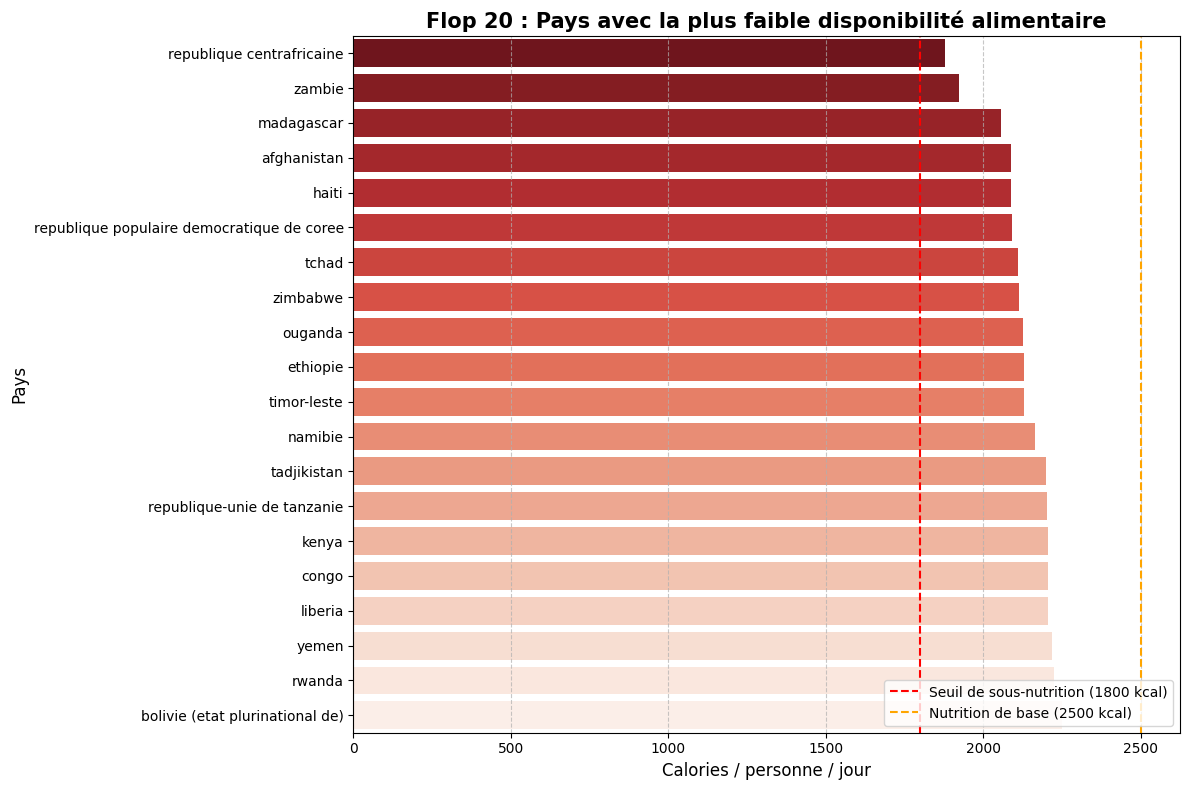

In [61]:
# 1. Calcul du total de calories par jour/personne par pays
# On somme tous les produits pour chaque pays
flop_20_calories = dispo.groupby('zone')['disponibilite_kcal_p_j'].sum().nsmallest(20).reset_index()

# 2. Affichage du tableau pour tes notes
print("--- FLOP 20 DES PAYS (Calories/jour/pers) ---")
print(flop_20_calories)

# 3. Création du graphique (Bar Chart)
plt.figure(figsize=(12, 8))
sns.barplot(data=flop_20_calories, x='disponibilite_kcal_p_j', y='zone', hue='zone', palette='Reds_r', legend=False)

# Ajout de la ligne critique (Seuil de sous-nutrition à 1800 kcal ou ton seuil de 2500)
plt.axvline(x=1800, color='red', linestyle='--', label='Seuil de sous-nutrition (1800 kcal)')
plt.axvline(x=2500, color='orange', linestyle='--', label='Nutrition de base (2500 kcal)')

plt.title('Flop 20 : Pays avec la plus faible disponibilité alimentaire', fontsize=15, fontweight='bold')
plt.xlabel('Calories / personne / jour', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('flop_20_calories.png')
plt.show()


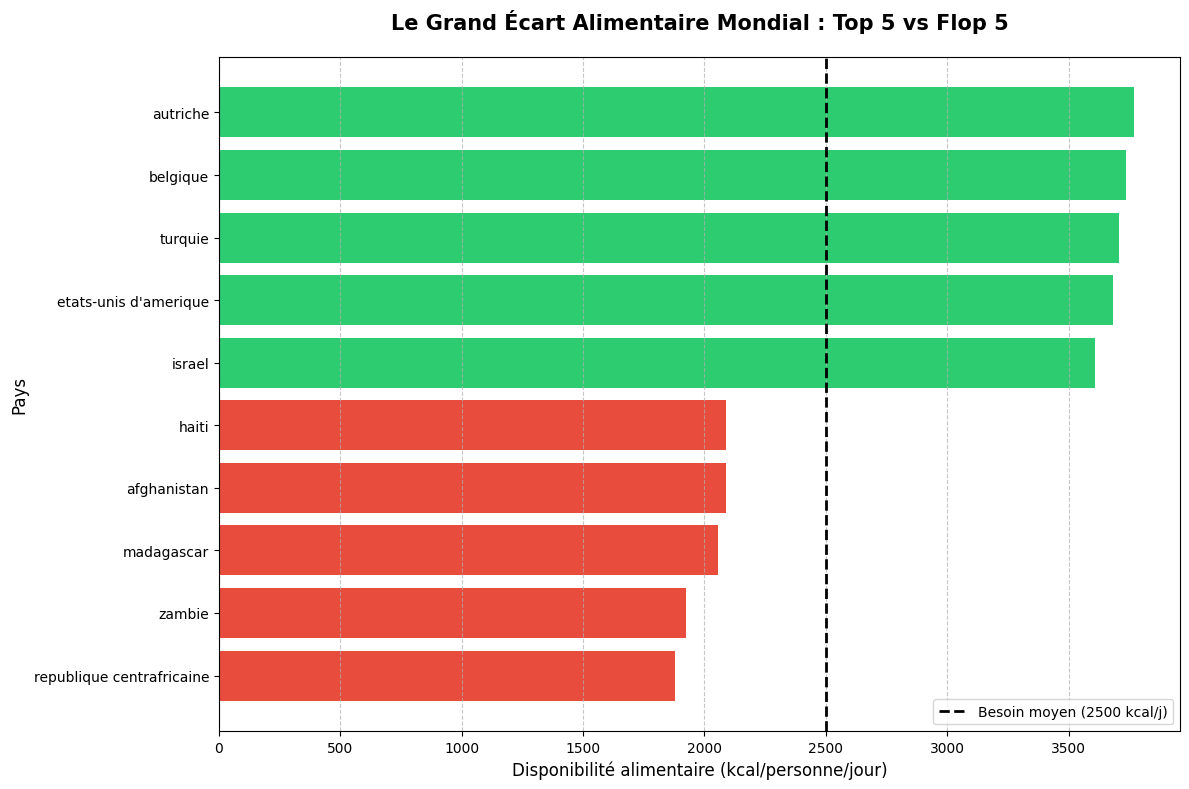

--- CHIFFRES CLÉS ---
Plus haute dispo  : Autriche avec 3770 kcal/j
Plus basse dispo  : Republique Centrafricaine avec 1879 kcal/j


In [62]:
# 1. Calcul de la disponibilité calorique totale par pays (en kcal/pers/jour)
# On additionne les calories de tous les produits pour chaque zone
dispo_kcal_total = dispo.groupby('zone')['disponibilite_kcal_p_j'].sum().reset_index()
dispo_kcal_total = dispo_kcal_total.sort_values(by='disponibilite_kcal_p_j', ascending=False)

# 2. Sélection du Top 5 et du Flop 5
top_5 = dispo_kcal_total.head(5)
flop_5 = dispo_kcal_total.tail(5)

# 3. Fusion pour le graphique (on garde l'ordre : les plus riches en haut)
extrems_5 = pd.concat([top_5, flop_5])

# 4. Création du graphique
plt.figure(figsize=(12, 8))

# Couleurs : Vert pour le Top 5, Rouge pour le Flop 5
colors = ['#2ecc71'] * 5 + ['#e74c3c'] * 5

# On utilise barh pour un graphique horizontal (plus lisible pour les noms de pays)
plt.barh(extrems_5['zone'], extrems_5['disponibilite_kcal_p_j'], color=colors)

# 5. Ajout de la ligne de seuil critique (2500 kcal/j)
plt.axvline(x=2500, color='black', linestyle='--', linewidth=2, label='Besoin moyen (2500 kcal/j)')

# 6. Personnalisation du graphique
plt.title('Le Grand Écart Alimentaire Mondial : Top 5 vs Flop 5', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Disponibilité alimentaire (kcal/personne/jour)', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverser l'axe Y pour avoir le Top 1 tout en haut
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Affichage des chiffres exacts pour ta slide
print("--- CHIFFRES CLÉS ---")
print(f"Plus haute dispo  : {top_5.iloc[0]['zone'].title()} avec {top_5.iloc[0]['disponibilite_kcal_p_j']:.0f} kcal/j")
print(f"Plus basse dispo  : {flop_5.iloc[-1]['zone'].title()} avec {flop_5.iloc[-1]['disponibilite_kcal_p_j']:.0f} kcal/j")


In [63]:
#On va mapper nos pays en région, afin de pouvoir faire des analyses par région continentale et avoir un aperçu global des inégalité devans la sous nutrition
df = jointure_2017 

# Nom de la colonne contenant les noms des pays
colonne_pays = 'zone' 

# 1. Obtenir la liste des valeurs uniques
liste_pays_uniques = df[colonne_pays].unique()

# 2. Afficher la liste (par exemple, triée)
print(f"Liste des {len(liste_pays_uniques)} pays uniques dans le DataFrame :")

# Pour une meilleure lisibilité on va afficher en liste triée
for zone in sorted(liste_pays_uniques):
    print(f"- {zone}")

#nous pouvons créer notre dictionnaire

regions_par_pays = {
    # --------------------------------------------------------------------------------
    # 1. AFRIQUE
    # --------------------------------------------------------------------------------
    'Afrique': [
        
        'afrique du sud',
        'algerie',
        'angola',
        'benin',
        'botswana',
        'burkina faso',
        'burundi',
        'cabo verde',
        'cameroun',
        'comores',
        'congo',
        'cote d\'ivoire',
        'djibouti',
        'egypte',
        'erythree',
        'eswatini',
        'ethiopie',
        'gabon',
        'gambie',
        'ghana',
        'guinee',
        'guinee equatoriale',
        'guinee-bissau',
        'kenya',
        'lesotho',
        'liberia',
        'libye',
        'madagascar',
        'malawi',
        'mali',
        'maroc',
        'mauritanie',
        'maurice',
        'mozambique',
        'namibie',
        'niger',
        'nigeria',
        'ouganda',
        'republique centrafricaine',
        'republique democratique du congo',
        'republique-unie de tanzanie',
        'rwanda',
        'sao tome-et-principe',
        'senegal',
        'seychelles',
        'sierra leone',
        'somalie',
        'soudan',
        'soudan du sud',
        'tchad',
        'togo',
        'tunisie',
        'zambie',
        'zimbabwe'
    ],
    
    # --------------------------------------------------------------------------------
    # 2. AMÉRIQUES
    # --------------------------------------------------------------------------------
    'Amériques': [
        'antigua-et-barbuda',
        'argentine',
        'bahamas',
        'barbade',
        'belize',
        'bolivie (etat plurinational de)',
        'bresil',
        'canada',
        'chili',
        'colombie',
        'costa rica',
        'cuba',
        'dominique',
        'el salvador',
        'equateur',
        'etats-unis d\'amerique',
        'grenade',
        'groenland',
        'guatemala',
        'guyana',
        'haiti',
        'honduras',
        'jamaique',
        'mexique',
        'nicaragua',
        'panama',
        'paraguay',
        'perou',
        'porto rico',
        'republique dominicaine',
        'saint-kitts-et-nevis',
        'saint-vincent-et-les grenadines',
        'sainte-lucie',
        'suriname',
        'trinite-et-tobago',
        'uruguay',
        'venezuela (republique bolivarienne du)'
    ],

    # --------------------------------------------------------------------------------
    # 3. ASIE
    # --------------------------------------------------------------------------------
    'Asie': [
        'afghanistan',
        'arabie saoudite',
        'armenie',
        'azerbaidjan',
        'bahrein',
        'bangladesh',
        'bhoutan',
        'brunei darussalam',
        'cambodge',
        'chine - ras de hong-kong',
        'chine - ras de macao',
        'chine, continentale',
        'chinois - ras de macao',
        'chine, continentale',
        'chine, taiwan province de',
        'emirats arabes unis',
        'inde',
        'indonesie',
        'iran (republique islamique d\')',
        'iraq',
        'israel',
        'japon',
        'jordanie',
        'kazakhstan',
        'kirghizistan',
        'koweit',
        'liban',
        'malaisie',
        'maldives',
        'mongolie',
        'myanmar',
        'nepal',
        'oman',
        'ouzbekistan',
        'pakistan',
        'palestine',
        'philippines',
        'qatar',
        'republique arabe syrienne',
        'republique de coree',
        'republique democratique populaire lao',
        'republique populaire democratique de coree',
        'singapour',
        'sri lanka',
        'tadjikistan',
        'thailande',
        'timor-leste',
        'turkmenistan',
        'turquie',
        'viet nam',
        'yemen'
    ],
    
    # --------------------------------------------------------------------------------
    # 4. EUROPE
    # --------------------------------------------------------------------------------
    'Europe': [
        'albanie',
        'allemagne',
        'andorre',
        'autriche',
        'belarus',
        'belgique',
        'bosnie-herzegovine',
        'bulgarie',
        'chypre',
        'croatie',
        'danemark',
        'espagne',
        'estonie',
        'federation de russie',
        'finlande',
        'france',
        'georgie',
        'grece',
        'hongrie',
        'irlande',
        'islande',
        'italie',
        'lettonie',
        'lituanie',
        'luxembourg',
        'macedoine du nord',
        'malte',
        'montenegro',
        'norvege',
        'pays-bas',
        'pologne',
        'portugal',
        'republique de moldova',
        'roumanie',
        'royaume-uni de grande-bretagne et d\'irlande du nord',
        'serbie',
        'slovaquie',
        'slovenie',
        'suede',
        'suisse',
        'tchequie',
        'ukraine'
    ],

    # --------------------------------------------------------------------------------
    # 5. OCÉANIE
    # --------------------------------------------------------------------------------
    'Océanie': [
        'australie',
        'fidji',
        'iles cook',
        'iles marshall',
        'iles salomon',
        'kiribati',
        'micronesie (etats federes de)',
        'nauru',
        'nioue',
        'nouvelle-caledonie',
        'nouvelle-zelande',
        'palaos',
        'papouasie-nouvelle-guinee',
        'polynesie francaise',
        'samoa',
        'samoa americaines',
        'tokelaou',
        'tonga',
        'tuvalu',
        'vanuatu'
    ],
    
    # --------------------------------------------------------------------------------
    # 6. ENCLAVES/TERRITOIRES SPÉCIAUX (si non inclus ci-dessus)
    # --------------------------------------------------------------------------------
    'Territoires Spéciaux': [
        'bermudes',
       
    ]
}







#---------------------------------------------------------------------------------




pays_to_region = {}
for region, countries in regions_par_pays.items():
    for country in countries:
        # On nettoie le nom (minuscules et sans espaces) pour assurer la correspondance
        pays_to_region[country.lower().strip()] = region

# 2. Ajout de la colonne 'continent' à ton dataframe jointure_2017
# On utilise .map() qui va chercher pour chaque pays son continent dans le dictionnaire
jointure_2017['continent'] = jointure_2017['zone'].map(pays_to_region)

# 3. Groupement des données par continent
stats_continents = jointure_2017.groupby('continent').agg({
    'population': 'sum',
    'sous_nutrition': 'sum'
}).reset_index()

# 4. Calcul de la proportion (%) par continent
stats_continents['proportion_sous_nutrition'] = (stats_continents['sous_nutrition'] / stats_continents['population']) * 100

# 5. Tri pour mettre en avant les zones les plus touchées
stats_continents = stats_continents.sort_values(by='proportion_sous_nutrition', ascending=False)

# Affichage du résultat
print("--- RÉPARTITION DE LA SOUS-NUTRITION PAR CONTINENT (2017) ---")
display(stats_continents)


Liste des 203 pays uniques dans le DataFrame :
- afghanistan
- afrique du sud
- albanie
- algerie
- allemagne
- andorre
- angola
- antigua-et-barbuda
- arabie saoudite
- argentine
- armenie
- australie
- autriche
- azerbaidjan
- bahamas
- bahrein
- bangladesh
- barbade
- belarus
- belgique
- belize
- benin
- bermudes
- bhoutan
- bolivie (etat plurinational de)
- bosnie-herzegovine
- botswana
- bresil
- brunei darussalam
- bulgarie
- burkina faso
- burundi
- cabo verde
- cambodge
- cameroun
- canada
- chili
- chine - ras de hong-kong
- chine - ras de macao
- chine, continentale
- chine, taiwan province de
- chypre
- colombie
- comores
- congo
- costa rica
- cote d'ivoire
- croatie
- cuba
- danemark
- djibouti
- dominique
- egypte
- el salvador
- emirats arabes unis
- equateur
- erythree
- espagne
- estonie
- eswatini
- etats-unis d'amerique
- ethiopie
- federation de russie
- fidji
- finlande
- france
- gabon
- gambie
- georgie
- ghana
- grece
- grenade
- groenland
- guatemala
- guinee


,continent,population,sous_nutrition,proportion_sous_nutrition
0,Afrique,1.242535e+09,148600000.0,11.959426
2,Asie,4.513852e+09,344700000.0,7.636494
1,Amériques,9.964176e+08,39600000.0,3.974237
3,Europe,7.501582e+08,2800000.0,0.373255
4,Océanie,4.077376e+07,0.0,0.000000
5,Territoires Spéciaux,6.304900e+04,0.0,0.000000


--- CHIFFRES POUR TON PPT (Aide en kg) ---


zone,ethiopie,republique arabe syrienne,soudan,soudan du sud,yemen
annee,,,,,
2013,"591,404,000","563,566,000","330,230,000","196,330,000","264,764,000"
2014,"586,624,000","651,870,000","321,904,000","450,610,000","103,840,000"
2015,"203,266,000","524,949,000","17,650,000","48,308,000","372,306,000"
2016,nan,"118,558,000",nan,nan,"465,574,000"


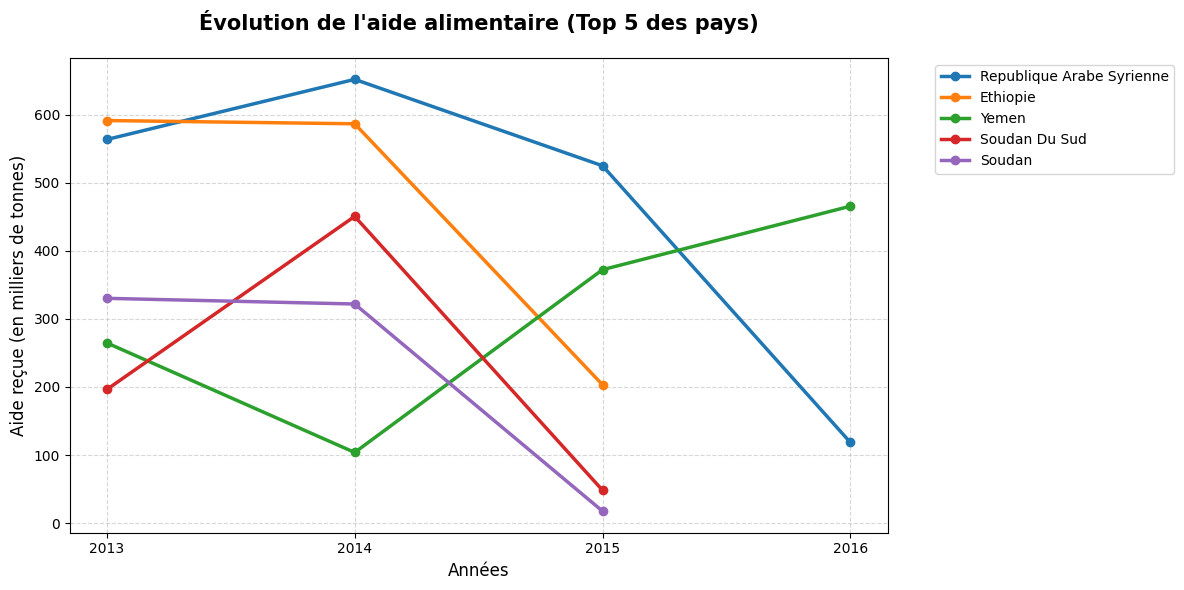

In [64]:
# 1. Identifier les 5 pays qui ont reçu le plus d'aide au total
top_5_pays = aide.groupby('zone')['aide_alimentaire'].sum().nlargest(5).index.tolist()

# 2. Filtrer et calculer le total par pays et par année
df_graph = aide[aide['zone'].isin(top_5_pays)].groupby(['zone', 'annee'])['aide_alimentaire'].sum().reset_index()

# 3. Créer le tableau pivot pour voir les chiffres (utile pour ton PPT)
tableau_chiffres = df_graph.pivot(index='annee', columns='zone', values='aide_alimentaire')
print("--- CHIFFRES POUR TON PPT (Aide en kg) ---")
display(tableau_chiffres.style.format("{:,.0f}"))

# 4. Création du Graphique
plt.figure(figsize=(12, 6))

for pays in top_5_pays:
    data = df_graph[df_graph['zone'] == pays]
    # On divise par 1 000 000 pour afficher en "milliers de tonnes" (plus lisible)
    plt.plot(data['annee'], data['aide_alimentaire'] / 1_000_000, marker='o', linewidth=2.5, label=pays.title())

# --- Réglages de l'échelle et des titres ---
plt.title("Évolution de l'aide alimentaire (Top 5 des pays)", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Aide reçue (en milliers de tonnes)", fontsize=12)

# On force l'affichage des années sans virgules
plt.xticks([2013, 2014, 2015, 2016])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [65]:
#Calcul du ration pertes : Aide alimentaire
# Somme mondiale des pertes et de l'aide alimentaire
total_pertes = dispo['pertes'].sum()
total_aide = aide['aide_alimentaire'].sum()

# Calcul du ratio
ratio_pertes_aide = total_pertes / total_aide

print(f"Les pertes mondiales représentent {ratio_pertes_aide:.1f} fois le volume de l'aide alimentaire mondiale.")


Les pertes mondiales représentent 41.1 fois le volume de l'aide alimentaire mondiale.


In [66]:
#calcul de la proportion de Thaïlandais en sous nutrition

pop_millions = float(pop_val) / 1_000_000 
snut_millions = float(str(snut_val).replace('<', '').strip()) / 1_000_000


taux_faim = (snut_millions / pop_millions) * 100
print(f"--- CHIFFRES RÉELS THAïLANDE (2017) ---")
print(f"Population : {pop_millions:.2f} millions d'habitants")
print(f"Sous-nutrition : {snut_millions :.2f} millions de personnes")
print(f"Taux de sous-nutrition : {taux_faim:.2f}%")



--- CHIFFRES RÉELS THAïLANDE (2017) ---
Population : 69.21 millions d'habitants
Sous-nutrition : 6.20 millions de personnes
Taux de sous-nutrition : 8.96%


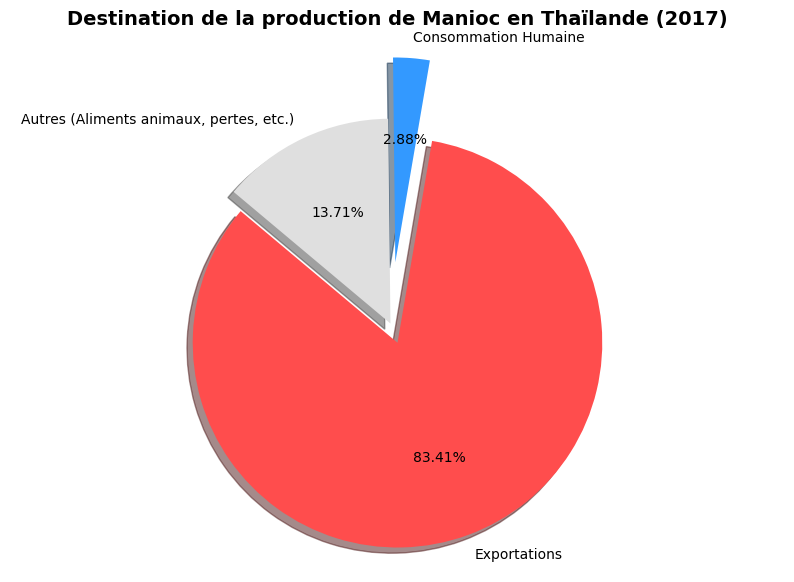

In [67]:
labels = ['Exportations', 'Consommation Humaine', 'Autres (Aliments animaux, pertes, etc.)']
# On utilise tes chiffres : 83.41% export, 2.88% humain, et le reste (13.71%)
sizes = [83.41, 2.88, 13.71] 
colors = ['#ff4d4d', '#3399ff', '#dfdfdf'] # Rouge pour l'export, Bleu pour l'humain, Gris pour le reste
explode = (0.1, 0.3, 0) # On "sort" les deux parts clés pour les mettre en évidence

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.2f%%', shadow=True, startangle=140)

plt.title('Destination de la production de Manioc en Thaïlande (2017)', fontsize=14, fontweight='bold')
plt.axis('equal') # Pour s'assurer que le camembert soit bien un cercle
plt.show()


In [68]:
#comparaison de la consomation de manioc du top 10 monde en 2017 par rapport a la consomation par habitan de la thailande

df_conso = pd.merge(dispo[dispo['produit'] == 'manioc'], 

                    population[population['annee'] == 2017], 

                    on='zone')





df_conso['conso_kg_pers_an'] = (df_conso['nourriture'] / df_conso['population'])



top_10 = df_conso[['zone', 'conso_kg_pers_an']].sort_values(by='conso_kg_pers_an', ascending=False)

print("--- TOP 10 CONSOMMATION RÉELLE (KG/HAB/AN) ---")

print(top_10.head(10))



conso_thai = top_10[top_10['zone'] == 'thailande']['conso_kg_pers_an'].values[0]

print(f"\nConsommation actuelle en Thaïlande : {conso_thai:.2f} kg/hab/an")

#-- Bien qu'un des leader de production de manioc, la thaïlande consomme trés peu ce qu'elle produit comparé au reste du monde


--- TOP 10 CONSOMMATION RÉELLE (KG/HAB/AN) ---
                          zone  conso_kg_pers_an
38                       congo        215.234914
100                 mozambique        204.195481
56                       ghana        192.229340
4                       angola        142.503718
123  republique centrafricaine        122.497211
114                   paraguay        122.323072
88                  madagascar        111.182756
84                     liberia        110.585922
105                    nigeria        108.113634
26                       benin        103.174906

Consommation actuelle en Thaïlande : 12.58 kg/hab/an


In [69]:
# On utilise la liste des céréales déjà définie dans votre étape 3.5
# total_kcal_monde doit être calculé sur la nourriture humaine uniquement
total_kcal_humain = dispo_pop['dispo_kcal_total'].sum()

# Filtrage des céréales
céréales_kcal = dispo_pop[dispo_pop['produit'].str.contains(pattern, case=False, na=False)]['dispo_kcal_total'].sum()

part_céréales = (céréales_kcal / total_kcal_humain) * 100
print(f"Part des céréales dans la disponibilité humaine : {part_céréales:.2f} %")
animale_kcal = dispo_pop[dispo_pop['origine'] == 'animale']['dispo_kcal_total'].sum()

part_animale = (animale_kcal / total_kcal_humain) * 100
print(f"Part des produits animaux dans la disponibilité humaine : {part_animale:.2f} %")
total_dispo_cereales = df_cereales['disponibilite_interieure'].sum()
total_feed_cereales = df_cereales['aliments_animaux'].sum()

part_feed = (total_feed_cereales / total_dispo_cereales) * 100
print(f"Part de la disponibilité intérieure des céréales utilisée pour les animaux : {part_feed:.2f} %")


Part des céréales dans la disponibilité humaine : 45.63 %
Part des produits animaux dans la disponibilité humaine : 17.49 %
Part de la disponibilité intérieure des céréales utilisée pour les animaux : 36.24 %


In [70]:
# 1. Filtrage sur les céréales
df_cereales = dispo[dispo['produit'].str.contains(pattern, case=False, na=False)]

# 2. Total de référence
total_dispo = df_cereales['disponibilite_interieure'].sum()

# 3. Recalcul avec la transformation (Traitement) incluse dans l'humain
part_humaine_elargie = ((df_cereales['nourriture'].sum() + df_cereales['traitement'].sum()) / total_dispo) * 100
part_animale = (df_cereales['aliments_animaux'].sum() / total_dispo) * 100

# 4. Le reste (Pertes, Semences et Autres)
part_pertes_et_autres = ((df_cereales['pertes'].sum() + df_cereales['semences'].sum() + df_cereales['autres_utilisations'].sum()) / total_dispo) * 100


print(f"1. Nourriture Humaine (+ Transfo) : {part_humaine_elargie:.1f} % ")
print(f"2. Nourriture Animale             : {part_animale:.1f} %  ")
print(f"3. Pertes, Semences & Autres      : {part_pertes_et_autres:.1f} % ")


1. Nourriture Humaine (+ Transfo) : 46.7 % 
2. Nourriture Animale             : 36.2 %  
3. Pertes, Semences & Autres      : 17.0 % 


In [71]:
# 1. On cible les 3 céréales les plus produites
top_3_cereales = ['ble', 'riz (eq blanchi)', 'mais']

# 2. On filtre et on calcule
df_top3 = dispo[dispo['produit'].isin(top_3_cereales)].groupby('produit').agg({
    'nourriture': 'sum',
    'aliments_animaux': 'sum'
}).reset_index()

# 3. Calcul des parts relatives
df_top3['total_usage'] = df_top3['nourriture'] + df_top3['aliments_animaux']
df_top3['%_humain'] = (df_top3['nourriture'] / df_top3['total_usage']) * 100
df_top3['%_animal'] = (df_top3['aliments_animaux'] / df_top3['total_usage']) * 100

print("--- COMPARAISON DES 3 PILIERS ALIMENTAIRES ---")
display(df_top3[['produit', '%_humain', '%_animal']])


--- COMPARAISON DES 3 PILIERS ALIMENTAIRES ---


,produit,%_humain,%_animal
0,ble,77.928551,22.071449
1,mais,18.647996,81.352004
2,riz (eq blanchi),91.823890,8.176110


In [72]:
top_3 = dispo[dispo['produit'].isin(df_cereales['produit'])].groupby('produit')['production'].sum().nlargest(3)

print("--- TOP 3 DES CÉRÉALES PRODUITES ---")
print(top_3)


--- TOP 3 DES CÉRÉALES PRODUITES ---
produit
mais                1.017029e+12
ble                 7.084430e+11
riz (eq blanchi)    4.954470e+11
Name: production, dtype: float64
